In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import dft
import scipy

In [2]:
def plot_adj(A_DC):  # Present the output matrix
    plt.imshow(A_DC, cmap='binary', interpolation='nearest')
    # plt.title('Adjacency Matrix of a directed unweighted cycle graph on N vertices')
    plt.xlabel('Vertices')
    plt.ylabel('Vertices')
    plt.colorbar(label='Edge Weight')
    plt.show()

Q.1

In [9]:
def cyclic_graph(N):
    adjacency_matrix = np.zeros((N, N), dtype=int)
    for i in range(N):
        adjacency_matrix[(i+1)%N, i] = 1  # Connect each vertex to its next vertex in the cycle
    return adjacency_matrix

In [10]:
def plot_graph_DC(N):  # Plot the Graph
    G_DC = nx.cycle_graph(N, create_using=nx.DiGraph())
    pos = nx.circular_layout(G_DC)
    nx.draw_networkx(G_DC, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, arrows=True)
    plt.title('Directed unweighted cycle graph on N vertices')
    plt.show()

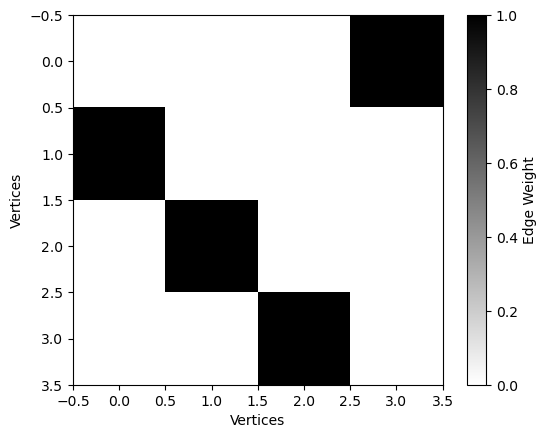

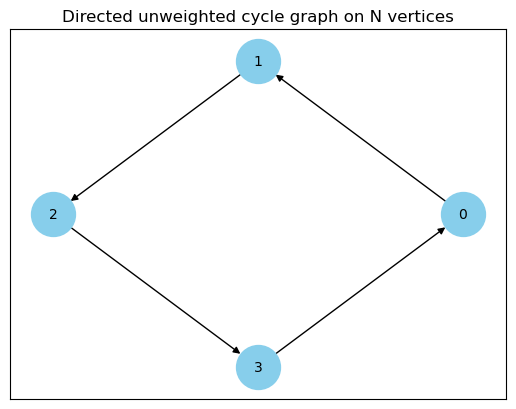

In [11]:
N = 4
A_DC = cyclic_graph(N)
# print("Adjacency Matrix for N =", N, ":\n", A_DC)
plot_adj(A_DC)
plot_graph_DC(N)

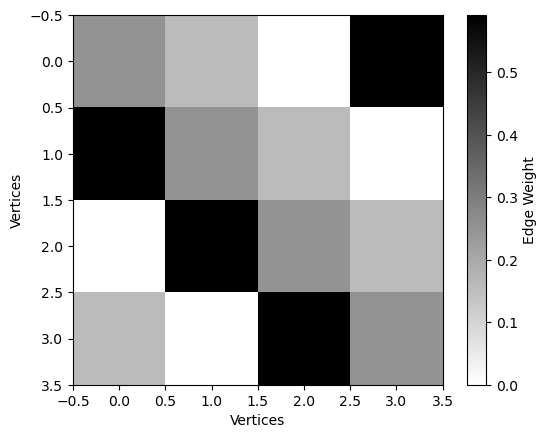

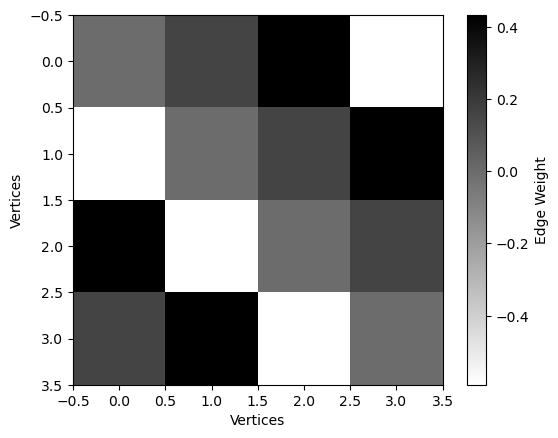

[[ 2.50000000e-01  1.58493649e-01 -2.18321021e-16  5.91506351e-01]
 [ 5.91506351e-01  2.50000000e-01  1.58493649e-01 -2.22044605e-16]
 [-2.77555756e-17  5.91506351e-01  2.50000000e-01  1.58493649e-01]
 [ 1.58493649e-01 -8.32667268e-17  5.91506351e-01  2.50000000e-01]]


In [14]:
# F = np.zeros((N, N), dtype=complex)
# for i in range(N):
#     for j in range(N):
#         F[i, j] = np.exp(-2j * np.pi * i * j / N) / np.sqrt(N)

F = dft(N)
F_inv = np.linalg.inv(F)

l = np.zeros((N, N), dtype=complex)
for i in range(N):
    l[i, i] = np.exp((-2*np.pi*1j*i)/3)

A = F_inv@l@F#F.conj().T@l@F
plot_adj(np.real(A))
plot_adj(np.imag(A))
print(np.real(A))